# Use sourmash to do tetramer nt frequency analysis

Below, we're going to use [sourmash](http://sourmash.readthedocs.io/en/latest/) to look at the tetramer content (k=4) of our assembled contigs.

## First, construct some signatures by running 'sourmash' at the command line.

In [1]:
cd ~/sourmash

/home/tx160085/sourmash


In [2]:
ls

2017-ucsc-metagenome.zip        out
individual-contigs.sig          sourmash-2017-ucsc-metagenome/
long-contigs.fa                 SRR1976948.abundtrim.subset.pe.fq.sig
long-contigs.matrix             SRR1977249.abundtrim.subset.pe.fq.sig
long-contigs.matrix.labels.txt  subset_assembly.fa.sig
long-contigs.sig                tetramer.png


In [3]:
# extract 5kb or longer sequences using khmer's 'extract-long-sequences'
!extract-long-sequences.py -l 5000 ../mapping/subset_assembly.fa -o long-contigs.fa


|| This is the script extract-long-sequences.py in khmer.
|| You are running khmer version 0+unknown
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.

wrote to: long-contigs.fa


In [4]:
# compute tetramer and pentamer nucleotide frequences for each contig
# --singleton says "compute signature for each sequence"
# -k 4,5 is ksizes to compute signatures for
# --track-abundance says "calculate frequencies of k-mers"
# --scaled=1 says "don't subsample at all, keep all tetramers"

!sourmash compute --singleton long-contigs.fa -o long-contigs.sig -k 4,5 --track-abundance --scaled=1

# running sourmash subcommand: compute
setting num_hashes to 0 because --scaled is set
computing signatures for files: long-contigs.fa
Computing signature for ksizes: [4, 5]
Computing only DNA (and not protein) signatures.
Computing a total of 2 signatures.
Tracking abundance of input k-mers.
calculated 1014 signatures for 507 sequences in long-contigs.fa


In [5]:
# compare all x all and save to a numpy matrix 'long-contigs.matrix'
!sourmash compare long-contigs.sig -o long-contigs.matrix -k 4 > /dev/null

# running sourmash subcommand: compare
loading long-contigs.sig
...sig loading 506
min similarity in matrix: 0.2275119902028233
saving labels to: long-contigs.matrix.labels.txt
saving distance matrix to: long-contigs.matrix


## Now, plot the comparisons using sourmash's internal API

(This could be done at the command line with `sourmash plot`, too.)

In [6]:
%matplotlib inline
from sourmash_lib import fig
import pylab

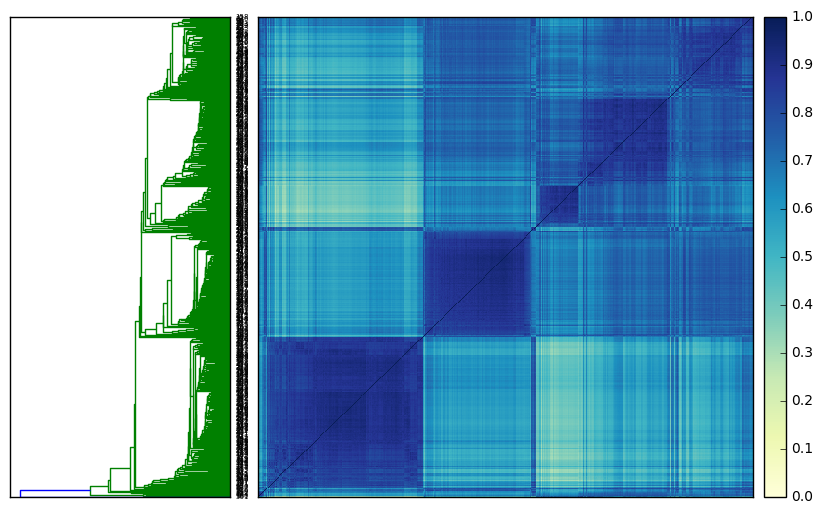

In [7]:
# note: you can adjust plots with 'vmin=0.3' or some such in the plot_composite_matrix function.
matrix, labels = fig.load_matrix_and_labels('long-contigs.matrix')
_ = fig.plot_composite_matrix(matrix, labels, show_labels=False)
pylab.savefig('tetramer.png')